In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/africa-economic-banking-and-systemic-crisis-data/african_crises.csv


In [2]:
df =  pd.read_csv('/kaggle/input/africa-economic-banking-and-systemic-crisis-data/african_crises.csv')

In [3]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
case                               1059 non-null int64
cc3                                1059 non-null object
country                            1059 non-null object
year                               1059 non-null int64
systemic_crisis                    1059 non-null int64
exch_usd                           1059 non-null float64
domestic_debt_in_default           1059 non-null int64
sovereign_external_debt_default    1059 non-null int64
gdp_weighted_default               1059 non-null float64
inflation_annual_cpi               1059 non-null float64
independence                       1059 non-null int64
currency_crises                    1059 non-null int64
inflation_crises                   1059 non-null int64
banking_crisis                     1059 non-null object
dtypes: float64(3), int64(8), object(3)
memory usage: 116.0+ KB


In [5]:
df.shape

(1059, 14)

In [6]:
df.banking_crisis.describe()

count          1059
unique            2
top       no_crisis
freq            965
Name: banking_crisis, dtype: object

In [7]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

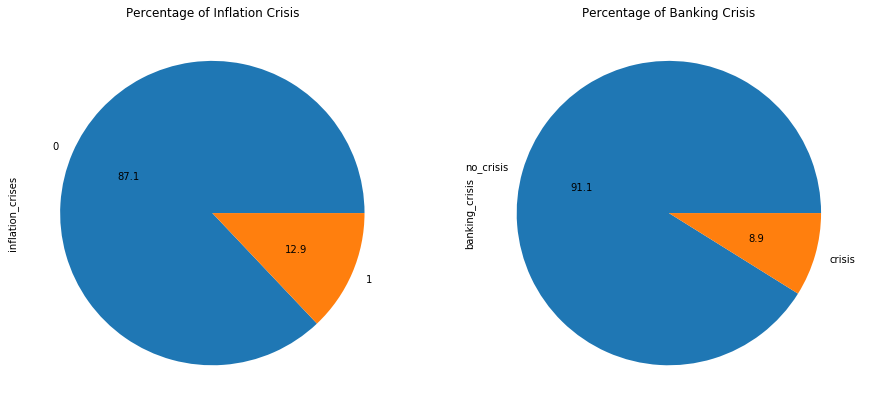

In [9]:
fig,ax = plt.subplots(1,2, figsize=(15,10))
vc=df['inflation_crises'].value_counts()
#print(vc)
vc.plot(kind='pie',autopct='%1.1f', ax = ax[0])

vc=df['banking_crisis'].value_counts()
#print(vc)
vc.plot(kind='pie',autopct='%1.1f',ax = ax[1])
ax[0].set_title('Percentage of Inflation Crisis')
ax[1].set_title('Percentage of Banking Crisis')
plt.show()

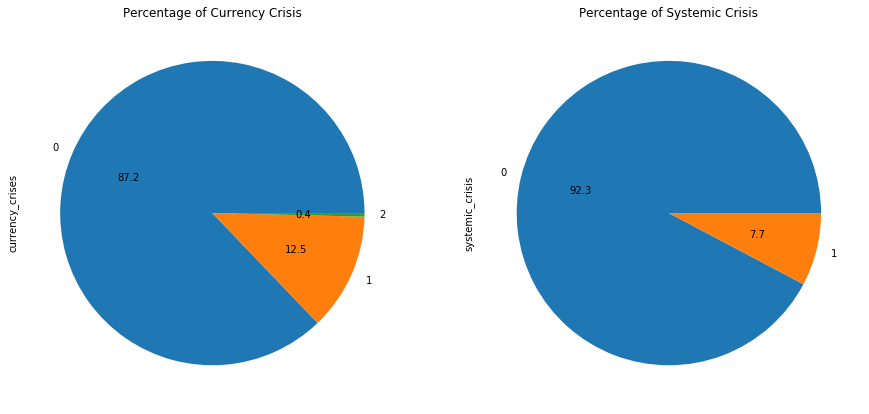

In [10]:
fig,ax = plt.subplots(1,2, figsize=(15,10))
vc=df['currency_crises'].value_counts()
vc.plot(kind='pie',autopct='%1.1f', ax = ax[0])

vc=df['systemic_crisis'].value_counts()
vc.plot(kind='pie',autopct='%1.1f',ax = ax[1])
ax[0].set_title('Percentage of Currency Crisis')
ax[1].set_title('Percentage of Systemic Crisis')
plt.show()

The percentage of cases with inflation crises is highest at 12.9%,
The percentage of cases with systemic crisis is the lowest at 7.7%.

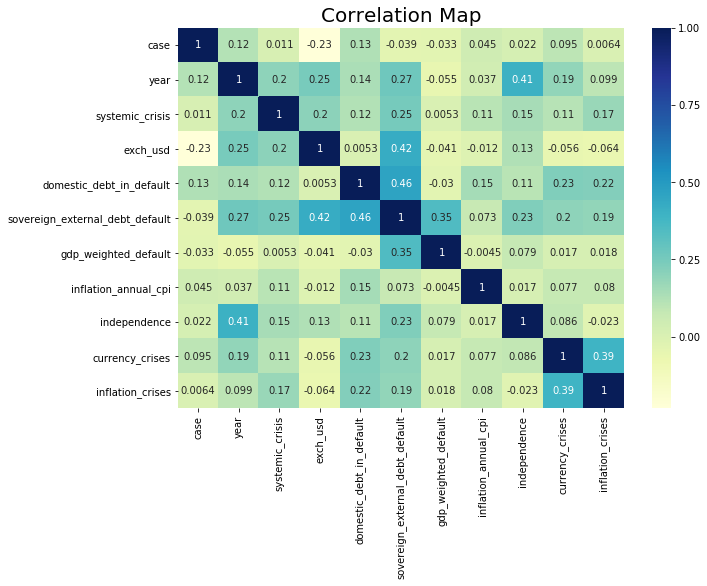

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True, cmap='YlGnBu')
plt.title("Correlation Map",fontsize=20)
plt.show()

1. The highest correlation exists between Domestic Debt in Default and Sovereign External Debt Default.
2. The lowest correlation is between Case and Exchange Used.

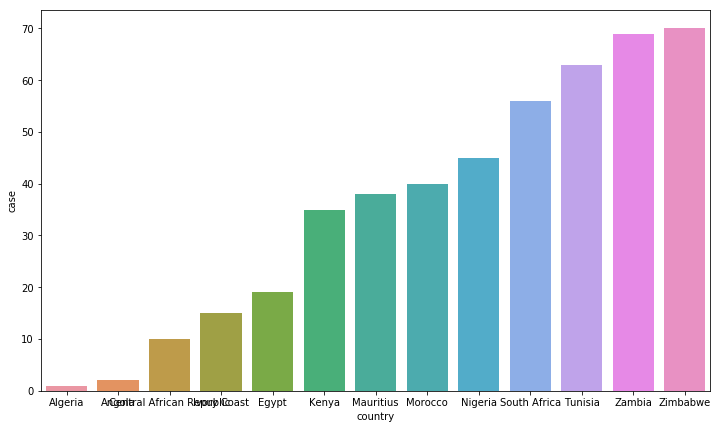

In [12]:
plt.figure(figsize=(12,7))
sns.barplot(data=df, x='country', y='case')
plt.show()

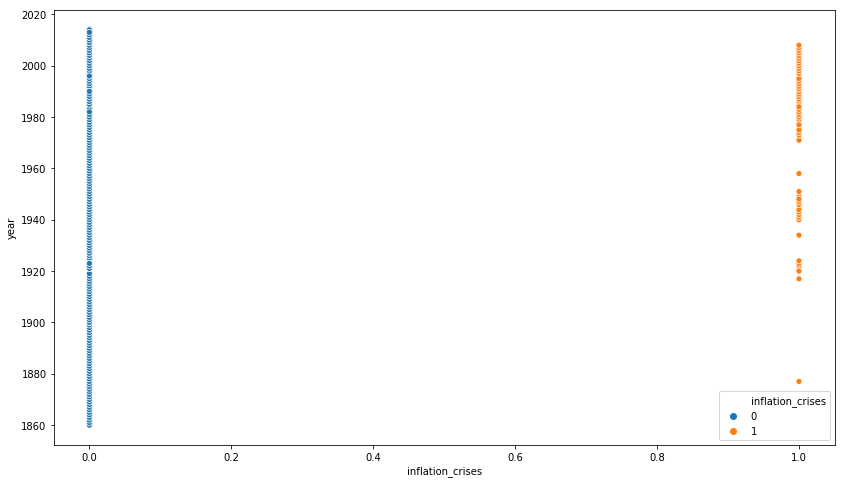

In [13]:
plt.figure(figsize=(14,8))
sns.scatterplot(data = df, y='year', x = 'inflation_crises',hue='inflation_crises')
plt.show()

The number of years that had inflation crisis = 1 is not in continuum. It means that inflation crisis did not occur continuously from 1860 to 2020.

****> Distribution of Exchange Rate of Countries w.r.t US Dollar

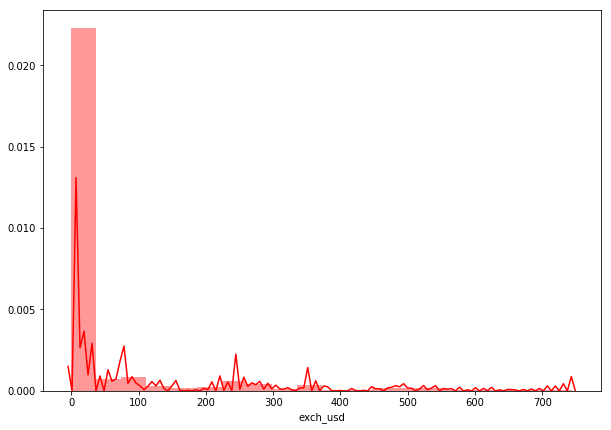

In [14]:
plt.figure(figsize=(10,7))
sns.distplot(df['exch_usd'], bins=20, hist=True, kde=True, color='r')
plt.show()

The kernel density is maximum between 0 to 25 (approximate range) implying that the maximum number of countries have an exchange rate in this range.

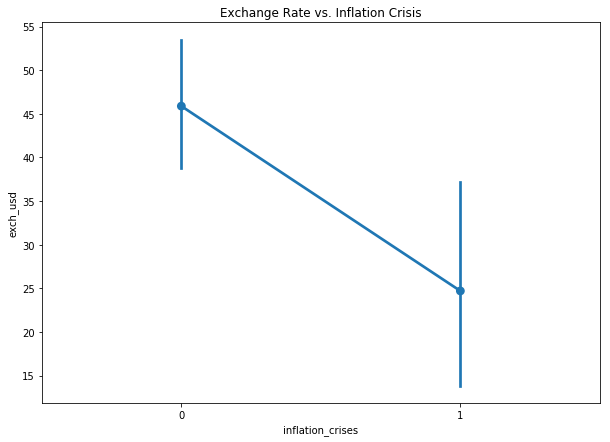

In [15]:
plt.figure(figsize=(10,7))
sns.pointplot(y=df['exch_usd'] , x= df['inflation_crises'])
plt.title('Exchange Rate vs. Inflation Crisis')
plt.show()

The countries with inflation crisis have a lower exchange rate (in US Dollars).

**Top Five Countries of Crisis**

In [16]:
topfive = df.groupby('country')['inflation_crises'].agg('sum').nlargest(5)

df['banking_crisis'] = df['banking_crisis'].map(lambda x : 1 if x == 'crisis' else 0)
topbank = df.groupby('country')['banking_crisis'].agg('sum').nlargest(5)


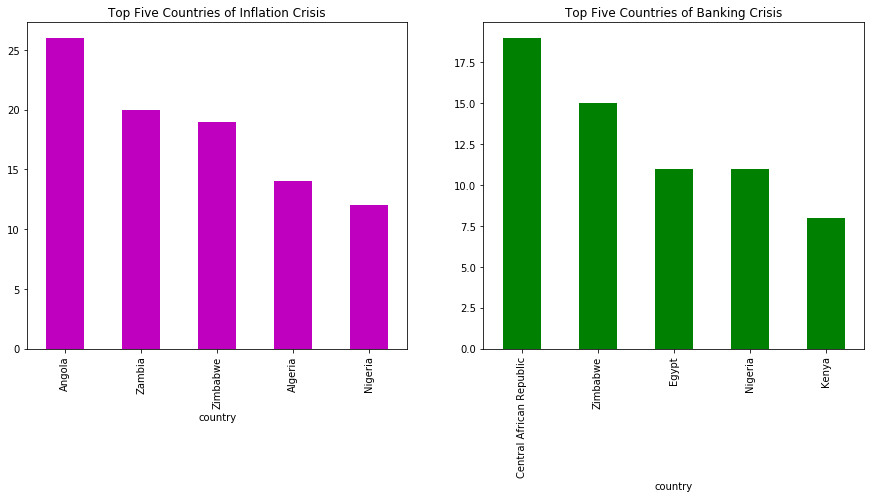

In [17]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
topfive.plot.bar(color='m', ax = ax[0])
topbank.plot.bar(color='g', ax = ax[1])
ax[0].set_title('Top Five Countries of Inflation Crisis')
ax[1].set_title('Top Five Countries of Banking Crisis')
plt.show()

In [18]:
curr = df.groupby('country')['currency_crises'].agg('sum').nlargest(5)
sys = df.groupby('country')['systemic_crisis'].agg('sum').nlargest(5)

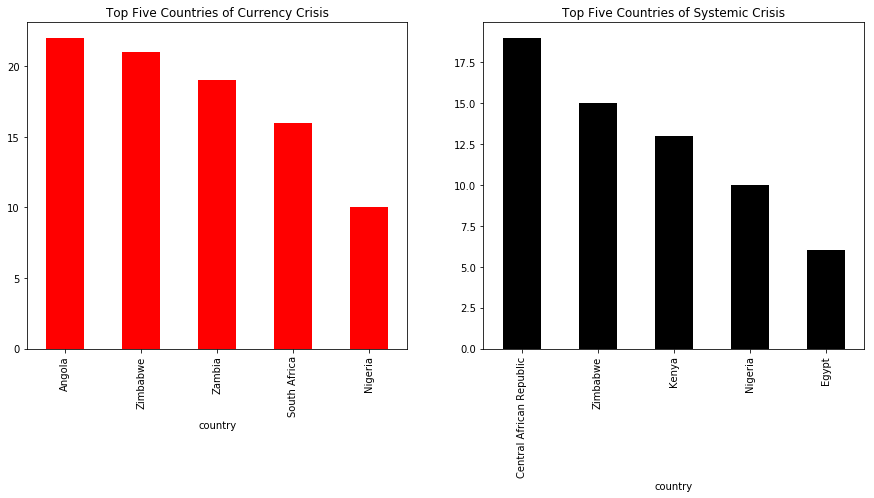

In [19]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
curr.plot.bar(color='r', ax = ax[0])
sys.plot.bar(color='k', ax = ax[1])
ax[0].set_title('Top Five Countries of Currency Crisis')
ax[1].set_title('Top Five Countries of Systemic Crisis')
plt.show()

Zimbabwe and Nigeria are among the top five countries in all four kinds of crises.

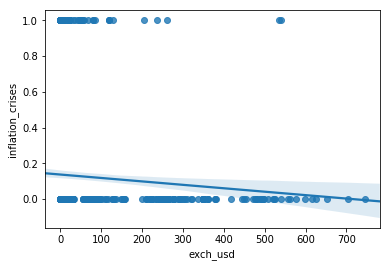

In [20]:
sns.regplot(data=df, y='inflation_crises', x='exch_usd')
plt.show()

As the above plot shows, the relationship between Inflation Crises and Exchange Rate is not profoundly linear. Thus, linear regression algoritm is not well-application

**Comparing Cross Validation Scores of Different Algorithms**

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])

In [23]:
df['cc3'] = le.fit_transform(df['cc3'])

In [24]:
X = df.drop('inflation_crises', axis=1)
y = df['inflation_crises']
cv_scr = cross_val_score(RandomForestClassifier(), X, y, cv = 10)
cv_scr

array([1.        , 1.        , 1.        , 0.99056604, 0.98113208,
       0.94339623, 0.93396226, 0.99047619, 1.        , 0.81904762])

In [25]:
sum1 = 0
for i in cv_scr:
    sum1 = sum1+i
    i +=1
print("The average accuracy of Random Forest algorithm with 10 folds is", sum1*100/10, "percent")

The average accuracy of Random Forest algorithm with 10 folds is 96.58580413297395 percent


In [26]:
cv_scr1 = cross_val_score(LogisticRegression(), X, y, cv = 10)
sum2 = 0
for i in cv_scr1:
    sum2 = sum2+i
    i +=1
print("The average accuracy of Logistic Regression algorithm with 10 folds is", sum2*100/10, "percent")

The average accuracy of Logistic Regression algorithm with 10 folds is 97.35038751878815 percent


In [27]:
cv_scr2 = cross_val_score(DecisionTreeClassifier(), X, y, cv = 10)
sum3 = 0
for i in cv_scr2:
    sum3 = sum3+i
    i +=1
print("The average accuracy of Decision Tree algorithm with 10 folds is", sum3*100/10, "percent")

The average accuracy of Decision Tree algorithm with 10 folds is 92.26228682268183 percent


In [28]:
cv_scr3 = cross_val_score(KNeighborsClassifier(), X, y, cv = 10)
sum4 = 0
for i in cv_scr3:
    sum4 = sum4+i
    i +=1
print("The average accuracy of KNN algorithm with 10 folds is", sum4*100/10, "percent")

The average accuracy of KNN algorithm with 10 folds is 93.66744758210109 percent


In [29]:
indices = ['Random Forest','Logistic Regression','Decision Tree', 'KNN']
bar = pd.DataFrame([sum1*10,sum2*10, sum3*10, sum4*10], index = indices)

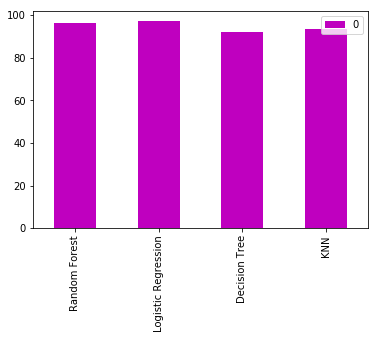

In [30]:
bar.plot.bar(color='m')
plt.show()

As seen in the bar chart, the cross validation score of Logistic Regression and Random Forest Classifer is almost the same, while the score for Decision Tree is the lowest.

**Random Forest**

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [32]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
print("The accuracy of the model is",model.score(X_test,y_test)*100,"percent")

The accuracy of the model is 98.42767295597484 percent


The accuracy score of Random Forest Classifier is 98.74 percent.****

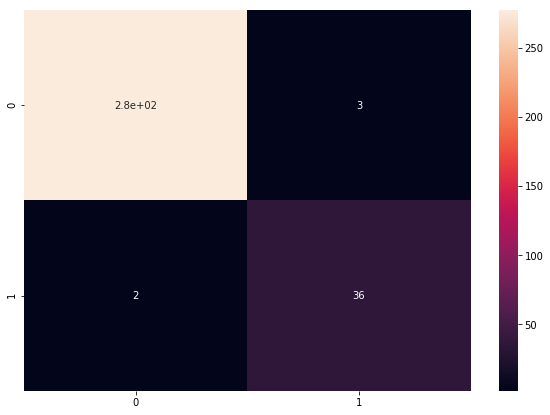

In [34]:
plt.figure(figsize=(10,7))
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

The confusion matrix obtained is almost the same as the one obtained in Random Forest implying that both Random Forest and Logistic Regression predict with almost the same accuracy (as can be confirmed by the model score above).

**Decision Tree****

In [35]:
gini = DecisionTreeClassifier()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)
gini.fit(X_train, y_train)
y_pred = gini.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy Score: ',accuracy_score(y_test, y_pred)*100,"percent")

Accuracy Score:  98.42767295597484 percent


In [38]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       280
           1       0.92      0.95      0.94        38

    accuracy                           0.98       318
   macro avg       0.96      0.97      0.96       318
weighted avg       0.98      0.98      0.98       318



****The cross-validation score of Decision Tree showed an accuracy of approximately 92% but on applicatiion of the Decision Tree model, we obtain an accuracy of 98.74%.********

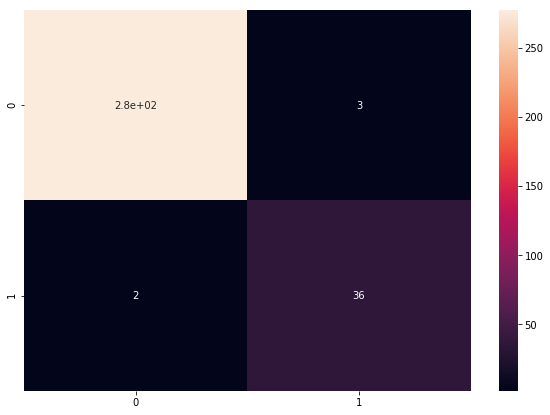

In [39]:
plt.figure(figsize=(10,7))
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

**K Nearest Neighbours**

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

**Hyperparametric Tuning**

In [42]:
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors':np.arange(1,25)}
knn_cv = GridSearchCV(knn, grid, cv=5)
knn_cv.fit(X,y)
print("Tuned Parameters are: {}".format(knn_cv.best_params_))
print("Best Score is: {}".format(knn_cv.best_score_))

Tuned Parameters are: {'n_neighbors': 5}
Best Score is: 0.9452313503305004


****Since after tuning, the best number of parameters has come out to be no. of neighbors = 5. We shall use KNN model with n_neighbors = 5 on our dataset.****

In [43]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("The accuracy score is", knn.score(X_test, y_test)*100,"percent")

The accuracy score is 95.59748427672956 percent


Out of the four methods that we have applied, KNN gives the lowest accuracy.

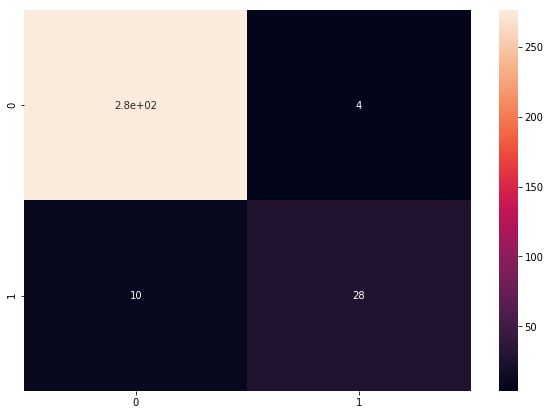

In [44]:
plt.figure(figsize=(10,7))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

The confusion matrix also confirms the fact that the accuracy of KNN is lower than the other three models because the number of False Positives and False Negatives in this case are higher than all the other three models.
